Perform the following operations using Python by creating student
performance dataset.

1. Display Missing Values
2. Replace missing values using any 2 suitable
3. Identify outliers using IQR and ZScore
4. Handle outlier using any technique
5. Perform data normalization using Min Max
6. Perform data normalization using decimal scaling
7. Handling outliers using Transformation
8. Handling outliers using Robust Statistical Methods

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore, iqr
from sklearn.preprocessing import MinMaxScaler

# Create a sample student performance dataset
data = {
    'Student_ID': [1, 2, 3, 4, 5, np.nan, 7, 8, 9, 10],
    'Math_Score': [85, 90, 88, 100, 92, 78, 85, 95, np.nan, 87],
    'Science_Score': [78, 85, np.nan, 94, 96, 208, 90, 82, 85, 79],
    'English_Score': [92, 88, 82, np.nan, 90, 84, 87, 95, 89, 91]
}

student_df = pd.DataFrame(data)

In [2]:
# 1. Display Missing Values
missing_values = student_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Student_ID       1
Math_Score       1
Science_Score    1
English_Score    1
dtype: int64


In [6]:
# 2. Replace missing values using mean and median
student_df['Math_Score'].fillna(student_df['Math_Score'].mean(), inplace=True)
student_df['Science_Score'].fillna(student_df['Science_Score'].median(), inplace=True)

# 3. Identify outliers using IQR and ZScore
# IQR method
Q1 = student_df.quantile(0.25)
Q3 = student_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((student_df < (Q1 - 1.5 * IQR)) | (student_df > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers using IQR:\n", outliers_iqr)


Outliers using IQR:
 Student_ID       0
Math_Score       0
Science_Score    1
English_Score    0
dtype: int64


In [7]:
# ZScore method
z_scores = np.abs(zscore(student_df))
threshold = 3
outliers_zscore = (z_scores > threshold).sum(axis=0)
print("\nOutliers using ZScore:\n", outliers_zscore)


Outliers using ZScore:
 Student_ID       0
Math_Score       0
Science_Score    0
English_Score    0
dtype: int64


In [5]:
# 4. Handle outliers using winsorization
from scipy.stats.mstats import winsorize

# Winsorize outliers in each column
student_df['Math_Score'] = winsorize(student_df['Math_Score'], limits=[0.05, 0.05])
student_df['Science_Score'] = winsorize(student_df['Science_Score'], limits=[0.05, 0.05])
student_df['English_Score'] = winsorize(student_df['English_Score'], limits=[0.05, 0.05])

# 5. Perform data normalization using Min-Max scaling
scaler = MinMaxScaler()
student_df[['Math_Score', 'Science_Score', 'English_Score']] = scaler.fit_transform(student_df[['Math_Score', 'Science_Score', 'English_Score']])

# Print the modified DataFrame
print("\nModified DataFrame after preprocessing:\n", student_df)


Modified DataFrame after preprocessing:
    Student_ID  Math_Score  Science_Score  English_Score
0         1.0    0.318182       0.000000       0.769231
1         2.0    0.545455       0.388889       0.461538
2         3.0    0.454545       0.388889       0.000000
3         4.0    1.000000       0.888889            NaN
4         5.0    0.636364       1.000000       0.615385
5         NaN    0.000000       0.555556       0.153846
6         7.0    0.318182       0.666667       0.384615
7         8.0    0.772727       0.222222       1.000000
8         9.0    0.494949       0.388889       0.538462
9        10.0    0.409091       0.055556       0.692308


In [6]:
# Ass 13:

# Perform data normalization using decimal scaling
def decimal_scaling(x):
    max_val = max(x)
    num_digits = len(str(int(max_val)))
    scaled = x / (10 ** num_digits)
    return scaled

student_df[['Math_Score', 'Science_Score', 'English_Score']] = student_df[['Math_Score', 'Science_Score', 'English_Score']].apply(decimal_scaling)

# Print the modified DataFrame
print("\nModified DataFrame after preprocessing:\n", student_df)


Modified DataFrame after preprocessing:
    Student_ID  Math_Score  Science_Score  English_Score
0         1.0    0.031818       0.000000       0.076923
1         2.0    0.054545       0.038889       0.046154
2         3.0    0.045455       0.038889       0.000000
3         4.0    0.100000       0.088889            NaN
4         5.0    0.063636       0.100000       0.061538
5         NaN    0.000000       0.055556       0.015385
6         7.0    0.031818       0.066667       0.038462
7         8.0    0.077273       0.022222       0.100000
8         9.0    0.049495       0.038889       0.053846
9        10.0    0.040909       0.005556       0.069231


array([[<AxesSubplot:title={'center':'Original Prices'}>,
        <AxesSubplot:title={'center':'Transformed Prices'}>]],
      dtype=object)

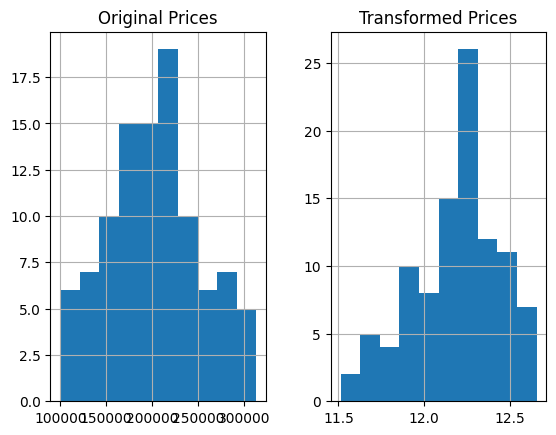

In [1]:
# 7. Transformation:
# Transformation involves applying mathematical functions to the data to modify its distribution and reduce the impact of outliers. One of the simplest transformations is the logarithmic transformation, which is particularly useful when the data is skewed or contains outliers.

import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(0)
house_prices = np.random.normal(loc=200000, scale=50000, size=100)
house_prices[house_prices < 100000] = 100000  # Introduce outliers

# Logarithmic transformation
transformed_prices = np.log(house_prices)

# Compare distributions
df = pd.DataFrame({"Original Prices": house_prices, "Transformed Prices": transformed_prices})
df.hist()

In [ ]:
# In this example, applying a logarithmic transformation to the house prices reduces the influence of extreme values, making the distribution more symmetrical and easier to work with.

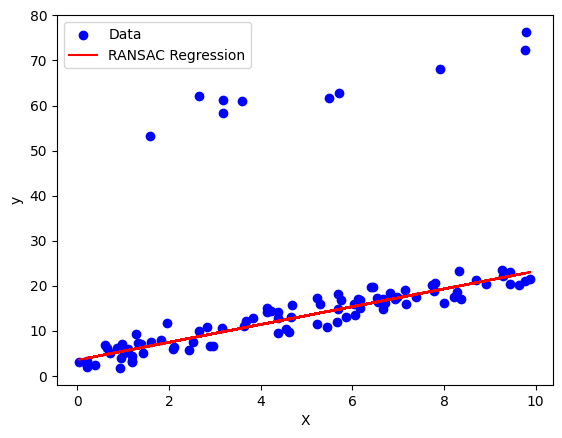

In [2]:
# 8. Robust Statistical Methods
# Robust statistical methods are less sensitive to outliers and provide more reliable estimates of parameters. One such method is RANSAC (RANdom SAmple Consensus), which is a robust regression technique commonly used for fitting models to data with outliers.

from sklearn.linear_model import RANSACRegressor
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.normal(scale=2, size=(100, 1))
y[::10] += 50  # Introduce outliers

# Fit RANSAC regression model
ransac = RANSACRegressor()
ransac.fit(X, y)

# Plot the data and the RANSAC regression line
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, ransac.predict(X), color='red', label='RANSAC Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# In this example, RANSAC identifies and fits the regression model to the inliers, ignoring the outliers. As a result, the fitted model is less affected by the presence of outliers and provides a more reliable estimate of the underlying relationship between the variables.